<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="600" height="200"/>

<h1><center><font size=8>Cars4U</center></font></h1>
<h1><center>Analitis, Iraklis - Project 2</center></h1>

##**Description**
**Context**

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

**Objective**

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.
 
##**Data Dictionary**
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

It contains the following variables:

*S.No.* - Serial number\
*Name* - Name of the car which includes brand name and model name\
*Location* - Location in which the car is being sold or is available for purchase (cities)\
*Year* - Manufacturing year of the car\
*Kilometers_driven* - The total kilometers driven in the car by the previous owner(s) in km\
*Fuel_Type* - The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)\
*Transmission* - The type of transmission used by the car (Automatic/Manual)
*Owner* - Type of ownership\
*Mileage* - The standard mileage offered by the car company in kmpl or km/kg\
*Engine* - The displacement volume of the engine in CC\
*Power* - The maximum power of the engine in bhp\
*Seats* - The number of seats in the car\
*New_Price* - The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)\
*Price* - The price of the used car in INR Lakhs

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read .csv file to construct DataFrame object
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/UTAustinAIMLProjects/Project2/used_cars_data.csv')

In [4]:
# check shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7253 rows and 14 columns.


In [5]:
# view first 5 rows of the dataset
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [6]:
# view last 5 rows of the dataset
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,86.97,NaN


In [7]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

In [8]:
# checking for duplicate values in the data
df.duplicated().sum()

0

- There are no duplicate values in the data.

In [9]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


* There are many numeric (`float64` and `int64` type) and string (`object` type) columns in the data.
* Dependent variable is the *Price* of a used car, which is of `float64` type.
* We also see that there are numerous columns with non-null values less than 7253 and therefore missing values in those rows, some of these columns with missing values are of type `object` and some are of type `float64`.

In [10]:
# Return the statistical summary of the numeric data and the mode/frequency of the mode for the categorical data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Return all unique instances from this column in a truncated format.
df['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Ford EcoSport 1.5 Petrol Ambiente',
       'Jeep Compass 1.4 Sport', 'Hyundai Elite i20 Magna Plus'],
      dtype=object)

There are various unique *Name* instances aside from the mode of 'Mahindra XUV500 W8 2WD'.

In [12]:
df['Name'].nunique()

2041

2041 unique names.

In [13]:
# Return all unique instances from this column in a truncated format.
df['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

There are various unique locations.

In [14]:
# Return all unique instances from this column in a truncated format.
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

There are 4 different types of fuel.

In [15]:
# Return all unique instances from this column in a truncated format.
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

Two types of transmission, obviously.

In [16]:
# Return all unique instances from this column in a truncated format.
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

Only four types of ownership since all ownership after 'Fourth' is included together with 'Fourth'.

In [17]:
# Return all unique instances from this column in a truncated format.
df['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [18]:
df['Mileage'].nunique()

450

450 different mileages.

In [19]:
# Return all unique instances from this column in a truncated format.
df['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [20]:
df['Engine'].nunique()

150

150 different volumes of engine.

In [21]:
# Return all unique instances from this column in a truncated format.
df['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp', nan,
       '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp', '218 bhp',
       '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp', '82.85 bhp',
       '67 bhp', '241.4 bhp', '35 bhp',

In [22]:
df['Power'].nunique()

385

385 different power levels.

In [23]:
# checking for missing values in the data.
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

* There are missing values in five of the fourteen columns provided.

### From the data overview, we see that many columns in the data need to be preprocessed before they can be used for analysis.

## Data Preprocessing

### We will drop the missing values in `Price` column as it is the target variable.

In [24]:
# Drops missing values from specified column and do operation inplace.
df.dropna(subset=["Price"], inplace=True)

In [25]:
# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)

In [26]:
# checking missing values in rest of the data
df.isnull().sum()

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
New_Price              0
Price                  0
dtype: int64

### The remaining 4 columns with missing values can likely be imputed with an inferred common value, a median value, or dropped altogether. The 3 columns with missing values of type `object` can also be converted to numerical dtypes or of type `categorical`.

####Let's drop the additional mileages since there are only the two.

In [27]:
# Drops missing values from specified column and do operation inplace.
df.dropna(subset=["Mileage"], inplace=True)

In [28]:
# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)

In [29]:
# Check null sum.
df.isnull().sum()

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                36
Power                143
Seats                 42
New_Price              0
Price                  0
dtype: int64

Let's also convert this column to a numeric and we will treat kmpl and kmpg as similar enough units for our set and ignore the minor difference.

In [30]:
# Remove units.
df['Mileage'] = df['Mileage'].str.replace(' kmpl','')

In [31]:
# Remove units.
df['Mileage'] = df['Mileage'].str.replace(' km/kg','')

In [32]:
#Convert column to numerical data.
df['Mileage'] = pd.to_numeric(df['Mileage'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6017 non-null   int64  
 1   Name               6017 non-null   object 
 2   Location           6017 non-null   object 
 3   Year               6017 non-null   int64  
 4   Kilometers_Driven  6017 non-null   int64  
 5   Fuel_Type          6017 non-null   object 
 6   Transmission       6017 non-null   object 
 7   Owner_Type         6017 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             5981 non-null   object 
 10  Power              5874 non-null   object 
 11  Seats              5975 non-null   float64
 12  New_Price          6017 non-null   float64
 13  Price              6017 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 658.2+ KB


####Let's do the same for the engine volume but instead insert the median into the null rows.

In [34]:
# Remove units.
df['Engine'] = df['Engine'].str.replace(' CC','')

In [35]:
#Convert column to numerical data.
df['Engine'] = pd.to_numeric(df['Engine'])

In [36]:
# Fill null rows with specified value.
df['Engine'].fillna((df['Engine'].median()), inplace=True)

In [37]:
# Check null sum.
df.isnull().sum()

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                143
Seats                 42
New_Price              0
Price                  0
dtype: int64

In [38]:
# Check info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6017 non-null   int64  
 1   Name               6017 non-null   object 
 2   Location           6017 non-null   object 
 3   Year               6017 non-null   int64  
 4   Kilometers_Driven  6017 non-null   int64  
 5   Fuel_Type          6017 non-null   object 
 6   Transmission       6017 non-null   object 
 7   Owner_Type         6017 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             6017 non-null   float64
 10  Power              5874 non-null   object 
 11  Seats              5975 non-null   float64
 12  New_Price          6017 non-null   float64
 13  Price              6017 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 658.2+ KB


####We'll do the exact same thing for the power.

In [39]:
# Remove units.
df['Power'] = df['Power'].str.replace(' bhp','')

In [40]:
#Convert column to numerical data.
df['Power'] = pd.to_numeric(df['Power'])

In [41]:
# Fill null rows with specified value.
df['Power'].fillna((df['Power'].median()), inplace=True)

In [42]:
df.isnull().sum()

S.No.                 0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                42
New_Price             0
Price                 0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6017 non-null   int64  
 1   Name               6017 non-null   object 
 2   Location           6017 non-null   object 
 3   Year               6017 non-null   int64  
 4   Kilometers_Driven  6017 non-null   int64  
 5   Fuel_Type          6017 non-null   object 
 6   Transmission       6017 non-null   object 
 7   Owner_Type         6017 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             6017 non-null   float64
 10  Power              6017 non-null   float64
 11  Seats              5975 non-null   float64
 12  New_Price          6017 non-null   float64
 13  Price              6017 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 658.2+ KB


####Finally, let's make an assumption that the most common number of seats based on common sense and our initial glimpse of the dataset is 5 seats and insert 5 seats into the null rows.

In [44]:
# Fill null rows with specified value.
df["Seats"].fillna(5, inplace = True)

In [45]:
# Check null sum.
df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6017 non-null   int64  
 1   Name               6017 non-null   object 
 2   Location           6017 non-null   object 
 3   Year               6017 non-null   int64  
 4   Kilometers_Driven  6017 non-null   int64  
 5   Fuel_Type          6017 non-null   object 
 6   Transmission       6017 non-null   object 
 7   Owner_Type         6017 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             6017 non-null   float64
 10  Power              6017 non-null   float64
 11  Seats              6017 non-null   float64
 12  New_Price          6017 non-null   float64
 13  Price              6017 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 658.2+ KB


Finally, let's convert all columns of type `object` that we know to be categorical columns to the type `categorical` in order to clean the data further.

In [47]:
df.Name = df.Name.astype('category')
df.Location = df.Location.astype('category')
df.Fuel_Type = df.Fuel_Type.astype('category')
df.Transmission = df.Transmission.astype('category')
df.Owner_Type = df.Owner_Type.astype('category')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              6017 non-null   int64   
 1   Name               6017 non-null   category
 2   Location           6017 non-null   category
 3   Year               6017 non-null   int64   
 4   Kilometers_Driven  6017 non-null   int64   
 5   Fuel_Type          6017 non-null   category
 6   Transmission       6017 non-null   category
 7   Owner_Type         6017 non-null   category
 8   Mileage            6017 non-null   float64 
 9   Engine             6017 non-null   float64 
 10  Power              6017 non-null   float64 
 11  Seats              6017 non-null   float64 
 12  New_Price          6017 non-null   float64 
 13  Price              6017 non-null   float64 
dtypes: category(5), float64(6), int64(3)
memory usage: 538.5 KB


All null values have been treated and all columns are of type float, int, or category.

### **Exploratory Data Analysis**

### **Univariate Analysis**

**Quantitative Data**

#### **Observations on S.No.**

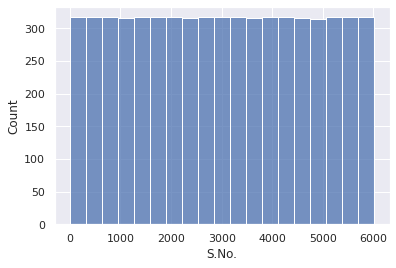

In [49]:
#Observe histogram plot of selected quantitative values from column (Returns a distribution of the occurrences of values within bins)
sns.histplot(data=df,x='S.No.')

- *As would be expected, the serial numbers seems to be quite evenly dstributed.*

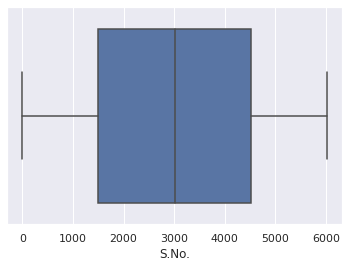

In [50]:
#Observe boxplot of selected quantitative values from column (Returns a boxplot showcasing quartiles and labelling outliers)
sns.boxplot(data=df,x='S.No.')

- *There does not seem to be any outliers with this column and the distribution still seems pretty even.*

#### **Observations on Year**

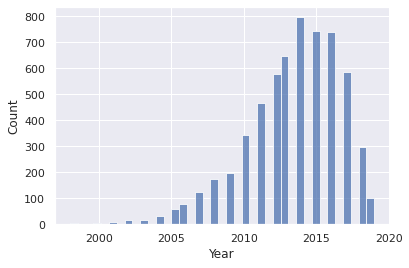

In [51]:
#Observe histogram plot of selected quantitative values from column (Returns a distribution of the occurrences of values within bins)
sns.histplot(data=df,x='Year')

- *This column is leftly skewed.*

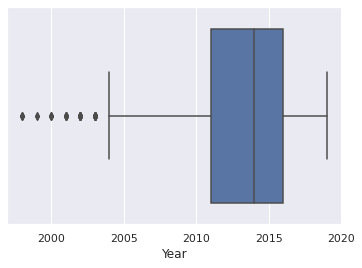

In [52]:
#Observe boxplot of selected quantitative values from column (Returns a boxplot showcasing quartiles and labelling outliers)
sns.boxplot(data=df,x='Year')

- *There exists leftward outliers in this column.*

#### **Observations on Kilometers_Driven**

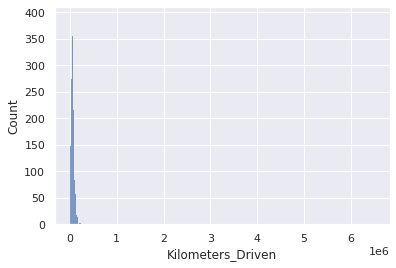

In [53]:
#Observe histogram plot of selected quantitative values from column (Returns a distribution of the occurrences of values within bins)
sns.histplot(data=df,x='Kilometers_Driven')

- *This column seems rightly skewed.*

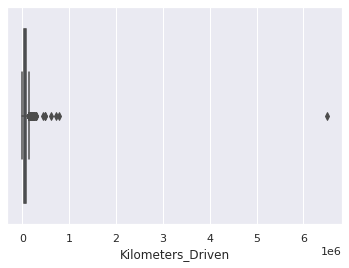

In [54]:
#Observe boxplot of selected quantitative values from column (Returns a boxplot showcasing quartiles and labelling outliers)
sns.boxplot(data=df,x='Kilometers_Driven')

- *There are outliers to the right.*

#### **Observations on Mileage**

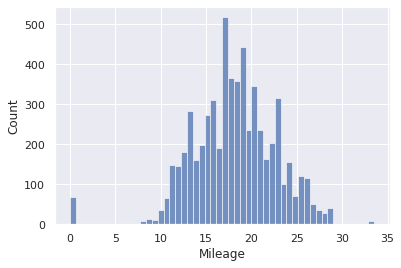

In [55]:
#Observe histogram plot of selected quantitative values from column (Returns a distribution of the occurrences of values within bins)
sns.histplot(data=df,x='Mileage')

- *At first glance, this column looks pretty normally distributed with outliers on both sides.*

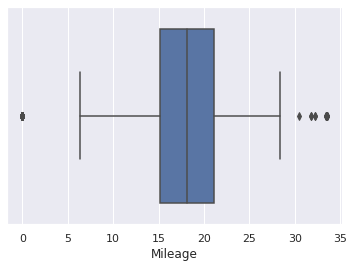

In [56]:
#Observe boxplot of selected quantitative values from column (Returns a boxplot showcasing quartiles and labelling outliers)
sns.boxplot(data=df,x='Mileage')

- *Outliers on both sides as expected.*

#### **Observations on Engine**

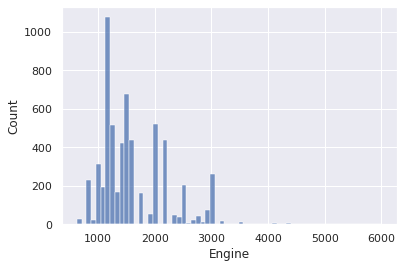

In [57]:
#Observe histogram plot of selected quantitative values from column (Returns a distribution of the occurrences of values within bins)
sns.histplot(data=df,x='Engine')

- *This is rightly skewed.*

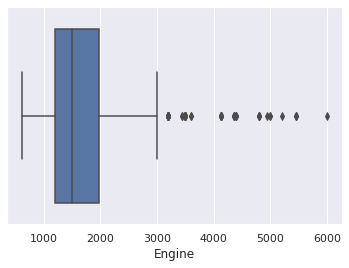

In [58]:
#Observe boxplot of selected quantitative values from column (Returns a boxplot showcasing quartiles and labelling outliers)
sns.boxplot(data=df,x='Engine')

- *Many outliers to the right of this.*

#### **Observations on Power**

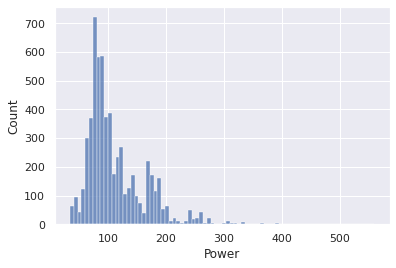

In [59]:
#Observe histogram plot of selected quantitative values from column (Returns a distribution of the occurrences of values within bins)
sns.histplot(data=df,x='Power')

- *This is also rightly skewed.*

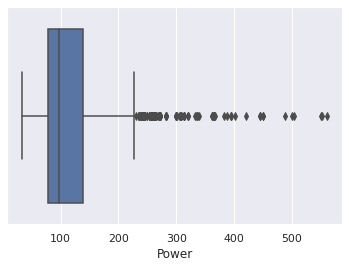

In [60]:
#Observe boxplot of selected quantitative values from column (Returns a boxplot showcasing quartiles and labelling outliers)
sns.boxplot(data=df,x='Power')

- *We can see that there are rightward outliers in the `Power` column.*

#### **Observations on Seats**

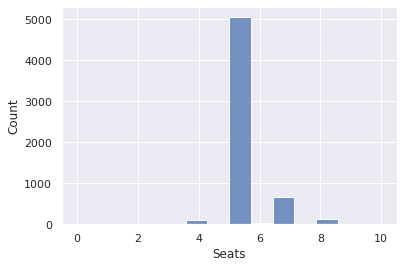

In [61]:
#Observe histogram plot of selected quantitative values from column (Returns a distribution of the occurrences of values within bins)
sns.histplot(data=df,x='Seats')

- *This seems to be very slightly skewed right.*

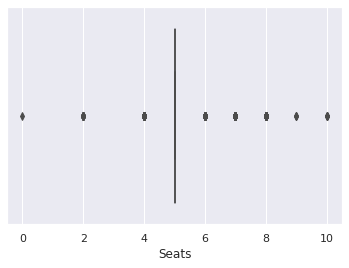

In [62]:
#Observe boxplot of selected quantitative values from column (Returns a boxplot showcasing quartiles and labelling outliers)
sns.boxplot(data=df,x='Seats')

- *With outliers on both sides. Most vehicles have the 5 seats as standard.*

#### **Observations on New_Price**

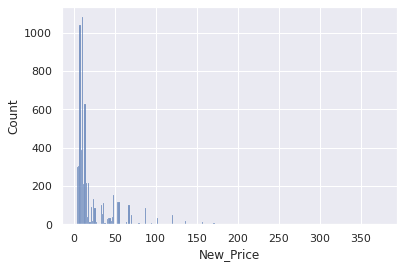

In [63]:
#Observe histogram plot of selected quantitative values from column (Returns a distribution of the occurrences of values within bins)
sns.histplot(data=df,x='New_Price')

- *We can see in this histogram that the `New_Price` column is rightly skewed.*

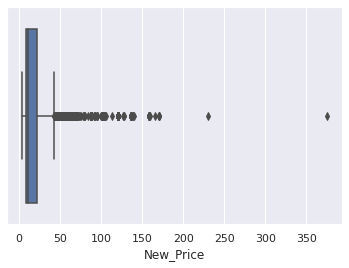

In [64]:
#Observe boxplot of selected quantitative values from column (Returns a boxplot showcasing quartiles and labelling outliers)
sns.boxplot(data=df,x='New_Price')

- *We can see that there are rightward outliers in the `New_Price` column.*

#### **Observations on Price**

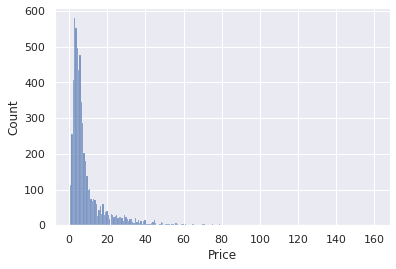

In [65]:
#Observe histogram plot of selected quantitative values from column (Returns a distribution of the occurrences of values within bins)
sns.histplot(data=df,x='Price')

- *`Price` is rightly skewed.*

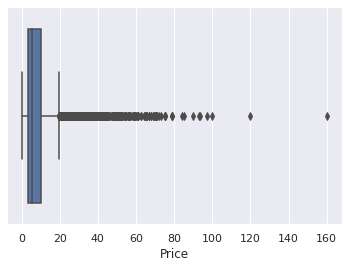

In [66]:
#Observe boxplot of selected quantitative values from column (Returns a boxplot showcasing quartiles and labelling outliers)
sns.boxplot(data=df,x='Price')

- *We can see that there are rightward outliers in the `Price` column.*

**Categorical Data**

#### **Observations on Name**

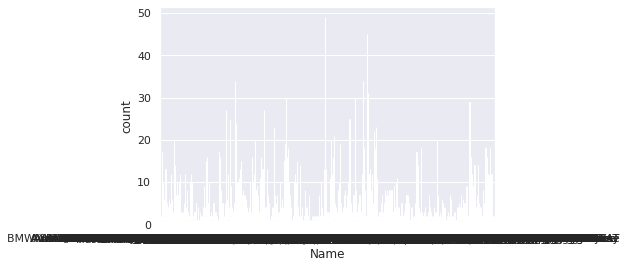

In [67]:
#Observe countplot of selected categorical values from column (Returns a frequency distribution)
sns.countplot(data=df,x='Name')

- *There are too many unique names and total count of names for a univariate analysis of this category to be very usefull, other than the modal name which we got for this column above. We'll just skip this category.*

#### **Observations on Location**

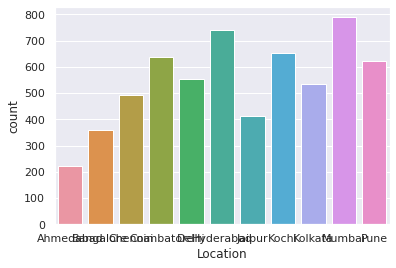

In [68]:
#Observe countplot of selected categorical values from column (Returns a frequency distribution)
sns.countplot(data=df,x='Location')

- *Similarly to `Name` univariate analysis of this category just doesn't tell us much more than we already know so we'll skip it.*

#### **Observations on Fuel_Type**

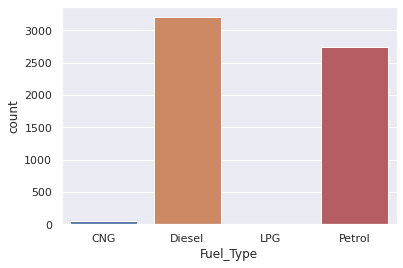

In [69]:
#Observe countplot of selected categorical values from column (Returns a frequency distribution)
sns.countplot(data=df,x='Fuel_Type')

- *Diesel is the most common as we already knew and almost every vehicle is either diesel or petrol, with very few having the other fuel_types.*

#### **Observations on Transmission**

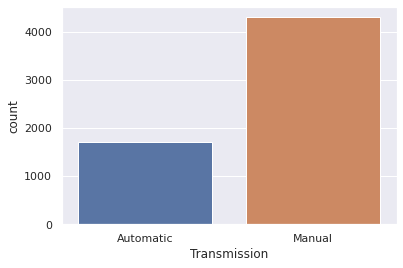

In [70]:
#Observe countplot of selected categorical values from column (Returns a frequency distribution)
sns.countplot(data=df,x='Transmission')

- *As we concluded earlier, the manual transmission vehicles are most common.*

#### **Observations on Owner_Type**

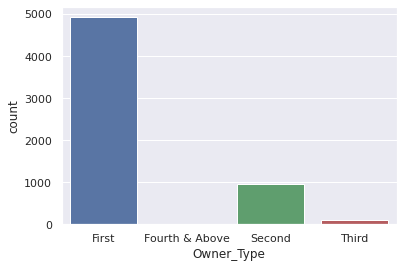

In [71]:
#Observe countplot of selected categorical values from column (Returns a frequency distribution)
sns.countplot(data=df,x='Owner_Type')

- *Most owners are the first owners with rapidly descending amounts in the set for each additional owner after the first.*

### **Bivariate Analysis**

**Let us plot bivariate charts between variables to understand their interaction with each other.**

In [72]:
#Observe a correlation table between all of the quantitative value columns in our set
df.corr()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,1.000000,0.002374,-0.008693,0.023677,-0.003818,-0.011747,-0.010620,-0.013408,-0.020374
Year,0.002374,1.000000,-0.173071,0.321565,-0.049737,0.024293,0.015211,-0.007377,0.305355
Kilometers_Driven,-0.008693,-0.173071,1.000000,-0.065253,0.090908,0.032045,0.082769,0.016718,-0.011480
Mileage,0.023677,0.321565,-0.065253,1.000000,-0.586733,-0.497763,-0.299637,-0.415010,-0.306593
Engine,-0.003818,-0.049737,0.090908,-0.586733,1.000000,0.860521,0.393466,0.697771,0.657848
Power,-0.011747,0.024293,0.032045,-0.497763,0.860521,1.000000,0.102373,0.792017,0.769982
Seats,-0.010620,0.015211,0.082769,-0.299637,0.393466,0.102373,1.000000,0.038481,0.052848
New_Price,-0.013408,-0.007377,0.016718,-0.415010,0.697771,0.792017,0.038481,1.000000,0.763393
Price,-0.020374,0.305355,-0.011480,-0.306593,0.657848,0.769982,0.052848,0.763393,1.000000


- *We can initially notice some significant correlation between the used price and new price, which makes sense, and would logically represent the depreciation. There is also an obvious correlation between the power of the vehicle and engine size, which makes sense as well. In addition to this, we also notice some interestingly negative correlations with mileage and other columns, but let's make a heatmap to better visualize all of this.*

#### **Correlation by Heatmap**

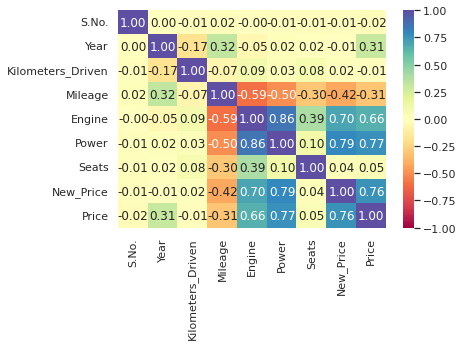

In [73]:
#Create an array of string names of the quantitative value columns
num_var = ['S.No.','Year','Kilometers_Driven','Mileage','Engine','Power', 'Seats','New_Price','Price']
#Check the correlation between these quantitative value columns
corr = df[num_var].corr()
#Plot the heatmap
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

- *The heat map effectively shows what we have already mentioned, as well as a correlation between the two price columns and both the engine and power columns, which would suggest that all four categories have some significant correlation between each other. Again we also see the negative correlations with the mileage category.*

#### **Bivariate Scatter Plots**

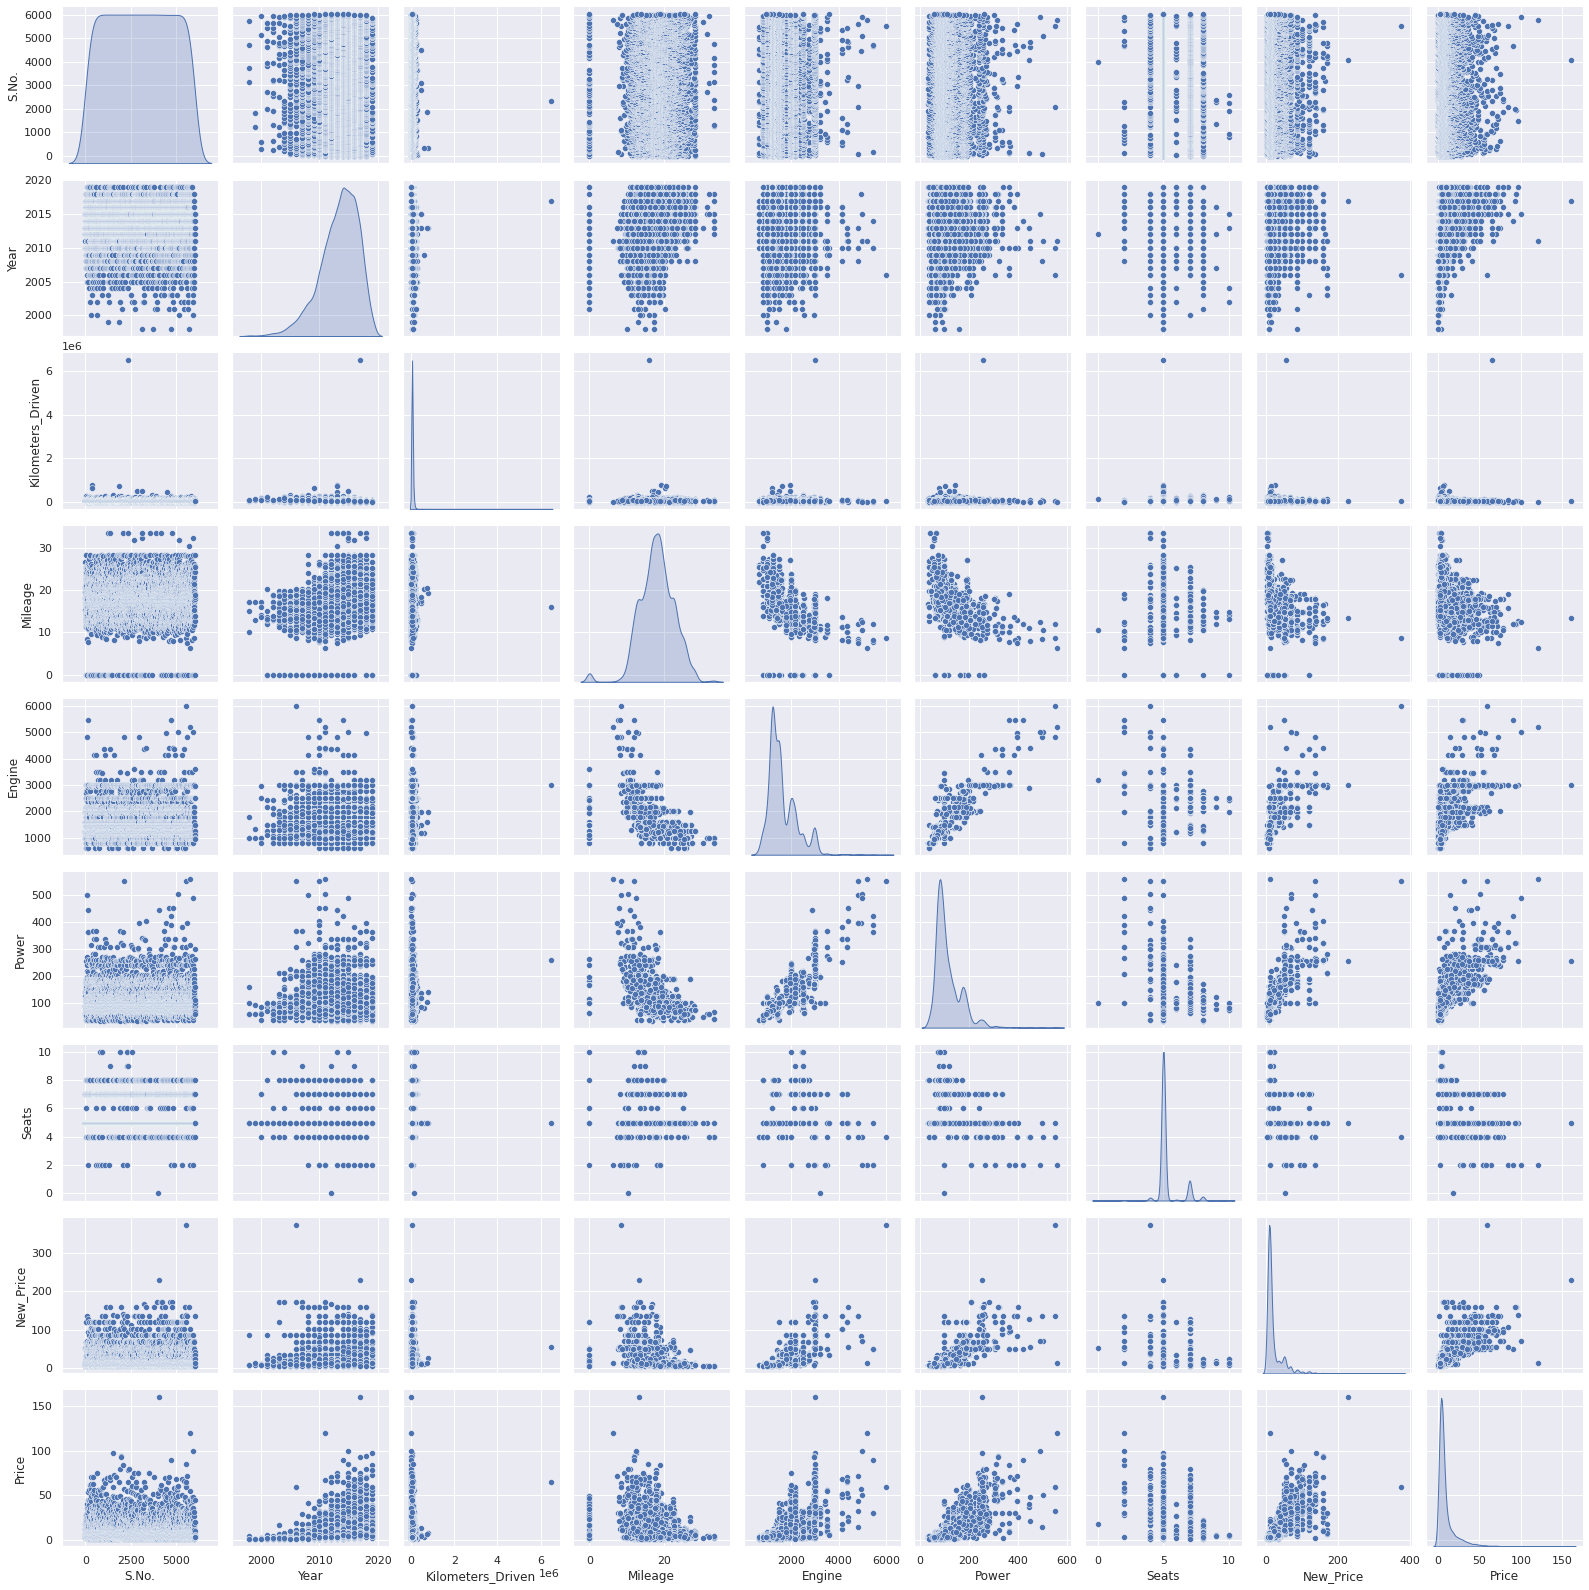

In [74]:
#Observe a pairplot between all of the numerical value columns
sns.pairplot(data=df[num_var], diag_kind="kde")

- *All of the pairs that we observe look to confirm what we have already determined from the heatmap and none of these pairs seem to suggest anything different. As expected, we see that the most obviously correlated columns are between `Power`, `Engine`, `New_Price`, and `Price`.*

In [75]:
# Return the statistical summary of the numeric data and the mode/frequency of the mode for the categorical data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,6017.0,NaN,NaN,NaN,3008.446236,1737.6982,0.0,1504.0,3008.0,4513.0,6018.0
Name,6017,1874,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,6017,11,Mumbai,789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6017.0,NaN,NaN,NaN,2013.358152,3.269967,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6017.0,NaN,NaN,NaN,58742.282034,91283.745583,171.0,34000.0,53000.0,73000.0,6500000.0
Fuel_Type,6017,4,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6017,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6017,4,First,4927,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6017.0,NaN,NaN,NaN,18.134961,4.582289,0.0,15.17,18.15,21.1,33.54
Engine,6017.0,NaN,NaN,NaN,1620.737078,599.398319,624.0,1198.0,1493.0,1969.0,5998.0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              6017 non-null   int64   
 1   Name               6017 non-null   category
 2   Location           6017 non-null   category
 3   Year               6017 non-null   int64   
 4   Kilometers_Driven  6017 non-null   int64   
 5   Fuel_Type          6017 non-null   category
 6   Transmission       6017 non-null   category
 7   Owner_Type         6017 non-null   category
 8   Mileage            6017 non-null   float64 
 9   Engine             6017 non-null   float64 
 10  Power              6017 non-null   float64 
 11  Seats              6017 non-null   float64 
 12  New_Price          6017 non-null   float64 
 13  Price              6017 non-null   float64 
dtypes: category(5), float64(6), int64(3)
memory usage: 538.5 KB


### <a id='link1'>Summary of EDA</a>

**Data Description:**

- The target variable (`Price`) is of *float64* type.
- Columns like `Name` and `Location` that were of *object* type have been interpreted to be categorical and converted to `category` type or have been converted to numerical data by dropping their respective units.
- All other columns are numeric in nature.
- There are no duplicate values in the data.
- There are some missing values in the data.

**Data Cleaning:**

- The null values for our target variable `Price` were dropped and the two null value rows for `Mileage` were also dropped.
- `Seats` were filled in with value 5 for the null rows as this was the most common.
- The remaining rows with null values were filled in with their respective medians.
- Categorical data was converted to the category type and numerical data of type object were converted to numerical data types.

**Observations from EDA:**

- `S.No.`: This is effectively just an even distribution.
- `Name`: No major observations, widely distributed.
- `Year`: Left skewed distribution.
- `Kilometers_Driven`: Right skewed distribution.
- `Fuel_Type`: Most vehicles are diesel or petrol.
- `Tranmission`: Most vehicles are manual.
- `Owner_Type`: Most vehicles are owned by original owner.
- `Mileage`: Seems to be pretty normally distrubuted with outliers on both sides.
- `Engine`: Right skewed distribution.
- `Power`: Right skewed distribution.
- `Seats`:Slightly right skewed, some outliers on both sides.
- `New_Price`: Right skewed.
- `Price`: Our target variable is right skewed.

## Variable Transformations

## Model Building

In [77]:
df2 = df.copy()

### Define dependent variable

In [78]:
X = df2.drop(["Price"], axis=1)
y = df2["Price"]

### Creating dummy variables

In [79]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Name_Audi A3 35 TDI Attraction,Name_Audi A3 35 TDI Premium,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,2010,72000,26.60,998.0,58.16,5.0,5.51,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,2015,41000,19.67,1582.0,126.20,5.0,16.06,0,0,...,0,0,1,1,0,0,1,0,0,0
2,2,2011,46000,18.20,1199.0,88.70,5.0,8.61,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,2012,87000,20.77,1248.0,88.76,7.0,11.27,0,0,...,0,0,0,1,0,0,1,0,0,0
4,4,2013,40670,15.20,1968.0,140.80,5.0,53.14,0,0,...,0,0,0,1,0,0,0,0,1,0


### Split the data into train and test

In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [81]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4211
Number of rows in test data = 1806


### Fitting a linear model

In [82]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

**Let us check the coefficients and intercept of the model, which are the parameters we learned.**

In [83]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
S.No.,7.068355e-06
Year,8.583444e-01
Kilometers_Driven,-1.359634e-05
Mileage,-4.914673e-02
Engine,-8.017538e-04
...,...
Transmission_Manual,1.946733e+06
Owner_Type_Fourth & Above,-1.186764e-01
Owner_Type_Second,-4.884873e-01
Owner_Type_Third,-1.497235e-01


### Coefficient Interpretations

* Coefficients of log of `Year` and `Tranmission`, specifically the manuals, with `Price` are significantly positive.
    - Increase in these will lead to an increase in the used price.


* Coefficients of `Owner_Type`, specifically the second owners, are negatively correlated with `Price`.
    - Increase in these will lead to a decrease in the used price.

### Model performance check

These definitions were adapted from the MLS as these are based on specific formulae and developing these myself would have been very redundant.

In [84]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [85]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.91841,0.950342,0.971041,0.947267,16.596948


In [86]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.144147e+07,8.253680e+06,-2.191380e+13,4.253163e+14,1.692858e+08


**Observations**

- The train and test $R^2$ are 0.97 and 0.70, indicating that the model explains 97% and 70% of the total variation in the train and test sets respectively.

- The RMSE values are widely different.

- This shows that the model is may be overfitting, likely due to the complexity of what we are feeding it and suggesting that we may want to trim the number of relevant categories in the future.

- MAE indicates that our current model is able to predict anime ratings within a mean error of 2.64 on the test set.

- MAPE of 44.43 on the test data means that we are able to predict within ~45% of the anime rating.

- The performance of this model is alright and useable, but can likely be improved with further data processing and training.

### **Actionable Insights and Recommendations**

#### **Insights**

We were able to develop a model that may be used by this business to accurately predict the prices of used cars based on certain factors.

We have been able to conclude that -  

1. Most of the vehicles in this dataset are owned by the first owner, have manual transmission, and use diesel fuel.
2. There are positive correlations between used price, price, engine, and power. There are also negative correlations between mileage and these columns as well.
3. There are positive coefficients for our model between price and the year and whether it has a manual transmission.
4. There are also negative coefficients in our model between price and the ownership categories beyond the primary owner, with the stongest coefficient being secondary ownership.
5. Our model is accurate and useful, but it is not great and can certainly be imporoved by tightening it.

#### **Recommendations to business**

1. My first recommendation to the business would be to focus their used supply purchases on that of manual transmission vehicles since we were able to quantify the coefficient present against this. Manual transmission vehicles are the most common in this business area and have a trend to sell for more. May also want to focus marketing of the business on manual transmission vehicles.
2. My second recommenation for the business would be to focus on purchasing used vehicles that are as new as possible, which is pretty self evident. Our model also suggests that the second owner of a vehicle experiences the most depreciation in its used price, with additional ownership negatively trending the price to a lesser and lesser degree. I would suggest to the business to therefore target primary owners to purchase from as they will be taking the most depreciation when selling to you and also targetting vehicles with many owners if the business would like to avoid depreciation on their stock as these will depreciate the most in value. I would likely avoid purchasing vehicles with ~3 owners and trend towards vehicles of 1 owner or 4+ owners due to specifically this strategy I am mentioning.

####  **Further Analysis that can be done**

1. The model should probably exclude unnecessary categories with lots of data, such as the `Name` and `Location` and then retrain.
2. It may be worth trying other methods of filling in null data in many of the categories that had missing values and see how much it affects the models.
3. If we could additional data on the vehicles or previous owners in general, some of that may be relevant to our model.